# Moringa Data Science Prep Project: Week 5

**Task:** As a team of Mckinsey Consultants we are going to be working with the World Food Organisation (WFP) this week. 
We will be helping WFP identify, define, and solve major problems in the Kenyan Agricultural sector. The team will specifically be looking at horticultural products meant for export. 

**RESEARCH QUESTIONS**

Which type of commodity had the most value : i.) Monthly
    ii.) Overall

Which type of commodity had the least value : i.) Monthly
    ii.) Overall

Which type of cut-flowers had the most value :  i.) Monthly
     ii.) Overall

Which type of Vegetables had the most value : i.) Monthly
     ii.) Overall

Which type of Fruits had the most value : i.) Monthly
      					       ii.) Overall

Which commodity had the highest value per kg? i.)Monthly
       ii.) Overall

Which month had the highest value of goods exported?

Which month had the lowest value of goods exported?

Which commodity did not sell at all?

How did special months affect the value of goods exported for different types of commodities?


**Dataset Provided**
Monthly Horticultural Exports, Flowers,Fruits and Vegetables between January,2015 to December,2015 - [https://www.opendata.go.ke/datasets/monthly-horticultural-exports-flowersfruits-and-vegetables-between-january2015-to-december2015/data ]

# Importing our Libraries 

In [0]:
#Importing libraries 
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading the Dataset

In [0]:
#Loading our dataset and previewing our dataset
#
url = 'https://opendata.arcgis.com/datasets/81045a2dc4e94be0a74539df523f7f39_0.csv?outSR=4326'
dataset_df = pd.read_csv(url)
dataset_df

,TYPE_OF_COMMODITY,COMMODITY,KGs,Value_of_Goods_Exported,DATE,OBJECTID
0,CUT-FLOWERS,ANTHURIUM LEAVES,3769.74,KES1707653.00,01/25/2015 12:00:00 AM,0
1,CUT-FLOWERS,CUT FOLIAGE,9040.37,KES4476063.00,01/25/2015 12:00:00 AM,1
2,CUT-FLOWERS,FILLERS,58.00,KES18938.00,01/25/2015 12:00:00 AM,2
3,CUT-FLOWERS,LEATHER LEAVES/FERN,309.72,KES121856.00,01/25/2015 12:00:00 AM,3
4,CUT-FLOWERS,RANUNCULUS,104.00,KES34827.00,01/25/2015 12:00:00 AM,4
...,...,...,...,...,...,...
1795,VEGETABLES,TURNIPS,63.00,KES42647.00,12/25/2015 12:00:00 AM,1795
1796,VEGETABLES,VALORE,0.00,KES0.00,12/25/2015 12:00:00 AM,1796
1797,VEGETABLES,BEAN PROCESSED,770650.88,KES115660099.00,12/25/2015 12:00:00 AM,1797
1798,VEGETABLES,SNOW/MANGETOUT,260.00,KES125520.00,12/25/2015 12:00:00 AM,1798


# Exploration

In [0]:
# commodity types:
dataset_df['TYPE_OF_COMMODITY'].unique()

array(['CUT-FLOWERS', 'VEGETABLES', 'FRUITS'], dtype=object)

In [0]:
# accessing information about the dataset:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TYPE_OF_COMMODITY        1800 non-null   object 
 1   COMMODITY                1800 non-null   object 
 2   KGs                      1800 non-null   float64
 3   Value_of_Goods_Exported  1788 non-null   object 
 4   DATE                     1800 non-null   object 
 5   OBJECTID                 1800 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 84.5+ KB


# Data Cleaning 

During data cleaning we are going to do the following:
1. Check for and dropping irrelevant columns.
2. Standardization; Change upper case values to lower case values, rename columns and data type conversion were necessary.
3. Check for null values and dropping them.
4. Check for missing values and act on them accordingly. 
5. Check for duplicate values and dropping them. 

In [0]:
# dropping 'OBJECTID'column not relevant for the analysis:
dataset_df.drop('OBJECTID', axis=1, inplace=True)
dataset_df.head(5)

,TYPE_OF_COMMODITY,COMMODITY,KGs,Value_of_Goods_Exported,DATE
0,CUT-FLOWERS,ANTHURIUM LEAVES,3769.74,KES1707653.00,01/25/2015 12:00:00 AM
1,CUT-FLOWERS,CUT FOLIAGE,9040.37,KES4476063.00,01/25/2015 12:00:00 AM
2,CUT-FLOWERS,FILLERS,58.00,KES18938.00,01/25/2015 12:00:00 AM
3,CUT-FLOWERS,LEATHER LEAVES/FERN,309.72,KES121856.00,01/25/2015 12:00:00 AM
4,CUT-FLOWERS,RANUNCULUS,104.00,KES34827.00,01/25/2015 12:00:00 AM


In [0]:
#Checking for missing values 
row_count = dataset_df.shape[0]
missing_count = row_count - dataset_df.count() 
missing_count

TYPE_OF_COMMODITY           0
COMMODITY                   0
KGs                         0
Value_of_Goods_Exported    12
DATE                        0
dtype: int64

There are 12 missing items in the 'Value_of_Goods_Exported' column.

In [0]:
# previewing the rows with missing values by
# creating bool series True for missing values in 'Value_of_Goods_Exported' column which has 12 missing values:  
bool_series = pd.isnull(dataset_df["Value_of_Goods_Exported"])  
# displaying data only with "Value_of_Goods_Exported" = NaN  
dataset_df[bool_series]
# 

,TYPE_OF_COMMODITY,COMMODITY,KGs,Value_of_Goods_Exported,DATE
28,CUT-FLOWERS,CARTHAMUS,0.00,NaN,01/25/2015 12:00:00 AM
179,CUT-FLOWERS,CARTHAMUS,0.00,NaN,02/25/2015 12:00:00 AM
330,CUT-FLOWERS,CARTHAMUS,0.00,NaN,03/25/2015 12:00:00 AM
480,CUT-FLOWERS,CARTHAMUS,0.00,NaN,04/25/2015 12:00:00 AM
631,CUT-FLOWERS,CARTHAMUS,0.00,NaN,05/25/2015 12:00:00 AM
782,CUT-FLOWERS,CARTHAMUS,0.00,NaN,06/25/2015 12:00:00 AM
932,CUT-FLOWERS,CARTHAMUS,0.00,NaN,07/25/2015 12:00:00 AM
1082,CUT-FLOWERS,CARTHAMUS,0.00,NaN,08/25/2015 12:00:00 AM
1228,CUT-FLOWERS,CARTHAMUS,0.00,NaN,09/25/2015 12:00:00 AM
1379,CUT-FLOWERS,CARTHAMUS,175.29,NaN,10/25/2015 12:00:00 AM


This reveals that 'CARTHAMUS' under COMMODITY is the most affected.

In [0]:
# previewing all rows and columns of the affected commodity:
CARTHAMUS_rows= dataset_df[dataset_df.COMMODITY == "CARTHAMUS"]
CARTHAMUS_rows

,TYPE_OF_COMMODITY,COMMODITY,KGs,Value_of_Goods_Exported,DATE
28,CUT-FLOWERS,CARTHAMUS,0.00,NaN,01/25/2015 12:00:00 AM
179,CUT-FLOWERS,CARTHAMUS,0.00,NaN,02/25/2015 12:00:00 AM
330,CUT-FLOWERS,CARTHAMUS,0.00,NaN,03/25/2015 12:00:00 AM
480,CUT-FLOWERS,CARTHAMUS,0.00,NaN,04/25/2015 12:00:00 AM
631,CUT-FLOWERS,CARTHAMUS,0.00,NaN,05/25/2015 12:00:00 AM
782,CUT-FLOWERS,CARTHAMUS,0.00,NaN,06/25/2015 12:00:00 AM
932,CUT-FLOWERS,CARTHAMUS,0.00,NaN,07/25/2015 12:00:00 AM
1082,CUT-FLOWERS,CARTHAMUS,0.00,NaN,08/25/2015 12:00:00 AM
1228,CUT-FLOWERS,CARTHAMUS,0.00,NaN,09/25/2015 12:00:00 AM
1379,CUT-FLOWERS,CARTHAMUS,175.29,NaN,10/25/2015 12:00:00 AM


In [0]:
v# dropping rows where 'CARTHAMUS' COMMODITY KGs is 0.00:
dataset_df.drop(dataset_df[dataset_df['KGs'] == 0.00].index, inplace = True)
# then previewing all rows and columns of the affected commodity after dropping rows where 'CARTHAMUS' COMMODITY KGs is 0.00:
cleaned_CARTHAMUS_rows= dataset_df[dataset_df.COMMODITY == "CARTHAMUS"]
cleaned_CARTHAMUS_rows

,TYPE_OF_COMMODITY,COMMODITY,KGs,Value_of_Goods_Exported,DATE
1379,CUT-FLOWERS,CARTHAMUS,175.29,NaN,10/25/2015 12:00:00 AM
1678,CUT-FLOWERS,CARTHAMUS,9.04,NaN,12/25/2015 12:00:00 AM


In [0]:
# Replacing NaN values on 'Value_of_Goods_Exported' for CARTHAMUS with KES0.00:
# 
dataset_df["Value_of_Goods_Exported"].fillna("KES0.00", inplace = True) 
#
# checking if the changes have been effected, and if there are any more null values in the dataset:
dataset_df.isnull().sum()

TYPE_OF_COMMODITY          0
COMMODITY                  0
KGs                        0
Value_of_Goods_Exported    0
DATE                       0
dtype: int64

We have no null values in the dataset.

In [0]:
# Checking for duplicates
duplicateRows = dataset_df[dataset_df.duplicated()]
duplicateRows.count()

TYPE_OF_COMMODITY          0
COMMODITY                  0
KGs                        0
Value_of_Goods_Exported    0
DATE                       0
dtype: int64

We have no duplicate rows in the dataset.

In [0]:
# changing and formatting the dataset column names:
dataset_df.rename(columns={"TYPE_OF_COMMODITY": "commodity_type", "COMMODITY": "commodity", "KGs": "weight_kgs",
                           "Value_of_Goods_Exported": "exportgoods_value_kes","DATE": "date"}, inplace=True)
dataset_df

,commodity_type,commodity,weight_kgs,exportgoods_value_kes,date
0,CUT-FLOWERS,ANTHURIUM LEAVES,3769.74,KES1707653.00,01/25/2015 12:00:00 AM
1,CUT-FLOWERS,CUT FOLIAGE,9040.37,KES4476063.00,01/25/2015 12:00:00 AM
2,CUT-FLOWERS,FILLERS,58.00,KES18938.00,01/25/2015 12:00:00 AM
3,CUT-FLOWERS,LEATHER LEAVES/FERN,309.72,KES121856.00,01/25/2015 12:00:00 AM
4,CUT-FLOWERS,RANUNCULUS,104.00,KES34827.00,01/25/2015 12:00:00 AM
...,...,...,...,...,...
1794,VEGETABLES,TURIA,1293.50,KES474026.00,12/25/2015 12:00:00 AM
1795,VEGETABLES,TURNIPS,63.00,KES42647.00,12/25/2015 12:00:00 AM
1797,VEGETABLES,BEAN PROCESSED,770650.88,KES115660099.00,12/25/2015 12:00:00 AM
1798,VEGETABLES,SNOW/MANGETOUT,260.00,KES125520.00,12/25/2015 12:00:00 AM


In [0]:
# checking the data types in 'exportgoods_value_kes' column:
#
dataset_df['exportgoods_value_kes'].apply(type).value_counts()

<class 'str'>    1338
Name: exportgoods_value_kes, dtype: int64

In [0]:
# removing the leading text(KES) from the 'exportgoods_value_kes' column:
# defining a function for cleaning the currency:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('KES', '')) 
    return(x)

In [0]:
# now applying the function to clean the 'exportgoods_value_kes'and return values as float:
dataset_df['exportgoods_value_kes'] = dataset_df['exportgoods_value_kes'].apply(clean_currency).astype('float')
pd.options.display.float_format = '{:.2f}'.format
# then previewing the top rows:
dataset_df.info()
dataset_df[:3]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   commodity_type         1338 non-null   object 
 1   commodity              1338 non-null   object 
 2   weight_kgs             1338 non-null   float64
 3   exportgoods_value_kes  1338 non-null   float64
 4   date                   1338 non-null   object 
dtypes: float64(2), object(3)
memory usage: 62.7+ KB


,commodity_type,commodity,weight_kgs,exportgoods_value_kes,date
0,CUT-FLOWERS,ANTHURIUM LEAVES,3769.74,1707653.00,01/25/2015 12:00:00 AM
1,CUT-FLOWERS,CUT FOLIAGE,9040.37,4476063.00,01/25/2015 12:00:00 AM
2,CUT-FLOWERS,FILLERS,58.00,18938.00,01/25/2015 12:00:00 AM


In [0]:
# Changing the 'date' column to datetime data type:
# 
dataset_df.date = pd.to_datetime(dataset_df.date)
# previewing to check if the change has taken effect:
print(dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   commodity_type         1338 non-null   object        
 1   commodity              1338 non-null   object        
 2   weight_kgs             1338 non-null   float64       
 3   exportgoods_value_kes  1338 non-null   float64       
 4   date                   1338 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 62.7+ KB
None


In [0]:
# then previewing the FI:
dataset_df.head(5)

# Performing Data Analysis

#### 1.) Type of Commodity with Most Value - Overall

In [0]:
# Q1. Which type of commodity had the most value? Monthly? Overall?
#
dataset_df.groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   62937532229.00
VEGETABLES    20939486522.00
FRUITS         6561800699.00
Name: exportgoods_value_kes, dtype: float64

##### Type of Commodity with Most Value - Monthly

In [0]:
#Type of Commodity with the Most value monthly

#January
dataset_df[dataset_df.date == '2015-01-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   4379457175.00
VEGETABLES    1556468133.00
FRUITS         476818915.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# February
dataset_df[dataset_df.date == '2015-02-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   6117176216.00
VEGETABLES    1362595322.00
FRUITS         412226076.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# March
dataset_df[dataset_df.date == '2015-03-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   8515110070.00
VEGETABLES    1498625005.00
FRUITS         496713543.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# April
dataset_df[dataset_df.date == '2015-04-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   4303702635.00
VEGETABLES    1371449984.00
FRUITS         548156580.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# May
dataset_df[dataset_df.date == '2015-05-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   4431880530.00
VEGETABLES    1431593543.00
FRUITS         436241202.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# June
dataset_df[dataset_df.date == '2015-06-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   3244356550.00
VEGETABLES    1337876435.00
FRUITS         557516854.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# July
dataset_df[dataset_df.date == '2015-07-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   6362960262.00
VEGETABLES    1305189772.00
FRUITS         882677133.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# August
dataset_df[dataset_df.date == '2015-08-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   3555006584.00
VEGETABLES    1655303589.00
FRUITS         613494599.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# September
dataset_df[dataset_df.date == '2015-09-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   4577574390.00
VEGETABLES    2985896260.00
FRUITS         623853281.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# October
dataset_df[dataset_df.date == '2015-10-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   7143885158.00
VEGETABLES    2283569945.00
FRUITS         477008850.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# November
dataset_df[dataset_df.date == '2015-11-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   5520026214.00
VEGETABLES    2129591192.00
FRUITS         445382473.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# December
dataset_df[dataset_df.date == '2015-12-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   4786396445.00
VEGETABLES    2021327342.00
FRUITS         591711193.00
Name: exportgoods_value_kes, dtype: float64

#### 2.) Type of Commodity with Least Value - Overall

In [0]:
# Q2. Which type of commodity had the least value? Monthly? Overall?

#Type of Commodity with least value overall
dataset_df.groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         6561800699.00
VEGETABLES    20939486522.00
CUT-FLOWERS   62937532229.00
Name: exportgoods_value_kes, dtype: float64

##### Type of Commodity with Least Value - Monthly

In [0]:
#Type of Commodity with the least value monthly

#January
dataset_df[dataset_df.date == '2015-01-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         476818915.00
VEGETABLES    1556468133.00
CUT-FLOWERS   4379457175.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# February
dataset_df[dataset_df.date == '2015-02-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         412226076.00
VEGETABLES    1362595322.00
CUT-FLOWERS   6117176216.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# March
dataset_df[dataset_df.date == '2015-03-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         496713543.00
VEGETABLES    1498625005.00
CUT-FLOWERS   8515110070.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# April
dataset_df[dataset_df.date == '2015-04-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         548156580.00
VEGETABLES    1371449984.00
CUT-FLOWERS   4303702635.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# May
dataset_df[dataset_df.date == '2015-05-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         436241202.00
VEGETABLES    1431593543.00
CUT-FLOWERS   4431880530.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# June
dataset_df[dataset_df.date == '2015-06-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         557516854.00
VEGETABLES    1337876435.00
CUT-FLOWERS   3244356550.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# July
dataset_df[dataset_df.date == '2015-07-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         882677133.00
VEGETABLES    1305189772.00
CUT-FLOWERS   6362960262.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# August
dataset_df[dataset_df.date == '2015-08-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         613494599.00
VEGETABLES    1655303589.00
CUT-FLOWERS   3555006584.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# September
dataset_df[dataset_df.date == '2015-09-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         623853281.00
VEGETABLES    2985896260.00
CUT-FLOWERS   4577574390.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# October
dataset_df[dataset_df.date == '2015-10-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         477008850.00
VEGETABLES    2283569945.00
CUT-FLOWERS   7143885158.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# November
dataset_df[dataset_df.date == '2015-11-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         445382473.00
VEGETABLES    2129591192.00
CUT-FLOWERS   5520026214.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# December
dataset_df[dataset_df.date == '2015-12-25'].groupby("commodity_type")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


commodity_type
FRUITS         591711193.00
VEGETABLES    2021327342.00
CUT-FLOWERS   4786396445.00
Name: exportgoods_value_kes, dtype: float64

#### 3.) Type of Cut-Flowers with Most Value - Overall

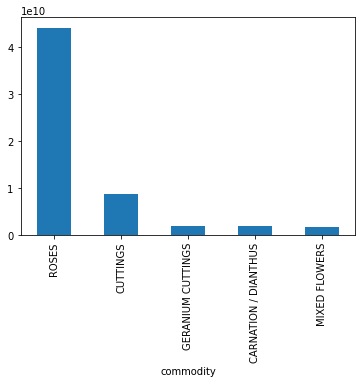

In [0]:
# Q3. Which type of cut-flowers had the most value? Monthly? Overall?
# Overall?
flower_plot = dataset_df[dataset_df.commodity_type == 'CUT-FLOWERS'].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()
flower_plot.plot.bar()

##### Type of Cut-Flowers with Most Value - Monthly

In [0]:
# Monthly? 

# January
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
Jan_Month = dataset_df['date'] == '2015-01-25'
dataset_df[Cut_Flowers & Jan_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
ROSES                  3185700257.00
CUTTINGS                383187389.00
GERANIUM CUTTINGS       313812245.00
MIXED FLOWERS            93280473.00
CARNATION / DIANTHUS     60272520.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# February
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
Feb_Month = dataset_df['date'] == '2015-02-25'
dataset_df[Cut_Flowers & Feb_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
ROSES                         4838506443.00
CUTTINGS                       601461877.00
CARNATION / DIANTHUS           148458602.00
MIXED FLOWERS                   76959520.00
GYPSOPHILLA / MILLION STARS     59156258.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# March
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
Mar_Month = dataset_df['date'] == '2015-03-25'
dataset_df[Cut_Flowers & Mar_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
ROSES                  5231748979.00
GERANIUM CUTTINGS      1291615579.00
CARNATION / DIANTHUS    637112137.00
CUTTINGS                469551985.00
HYPERICUM               169386374.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# April
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
Apr_Month = dataset_df['date'] == '2015-04-25'
dataset_df[Cut_Flowers & Apr_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
ROSES                         3502295002.00
CUTTINGS                       272541229.00
CARNATION / DIANTHUS            86503014.00
MIXED FLOWERS                   80947599.00
GYPSOPHILLA / MILLION STARS     55487387.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# May
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
May_Month = dataset_df['date'] == '2015-05-25'
dataset_df[Cut_Flowers & May_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
ROSES                     3531459457.00
CUTTINGS                   218040101.00
CHRYSANTHEMUMS CUTTINGS    128035889.00
MIXED FLOWERS              120510340.00
CARNATION / DIANTHUS       104119340.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# June
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
June_Month = dataset_df['date'] == '2015-06-25'
dataset_df[Cut_Flowers & June_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
ROSES                  2296263903.00
CUTTINGS                471479898.00
CARNATION / DIANTHUS    137816679.00
MIXED FLOWERS           111306761.00
SOLIDAGO                 38191398.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# July
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
July_Month = dataset_df['date'] == '2015-07-25'
dataset_df[Cut_Flowers & July_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
CUTTINGS                      3437979029.00
ROSES                         2512009009.00
CARNATION / DIANTHUS            85015130.00
MIXED FLOWERS                   84556906.00
GYPSOPHILLA / MILLION STARS     41486424.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# August
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
Aug_Month = dataset_df['date'] == '2015-08-25'
dataset_df[Cut_Flowers & Aug_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
ROSES                         2508429125.00
CUTTINGS                       570021667.00
MIXED FLOWERS                  131217074.00
CARNATION / DIANTHUS            92260332.00
GYPSOPHILLA / MILLION STARS     44715249.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# September
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
Sept_Month = dataset_df['date'] == '2015-09-25'
dataset_df[Cut_Flowers & Sept_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
ROSES                         3393323056.00
CUTTINGS                       385422509.00
MIXED FLOWERS                  381526746.00
CARNATION / DIANTHUS           121182867.00
GYPSOPHILLA / MILLION STARS     44015078.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# October
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
Oct_Month = dataset_df['date'] == '2015-10-25'
dataset_df[Cut_Flowers & Oct_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
ROSES                  5715510707.00
CUTTINGS                440323753.00
GERANIUM CUTTINGS       265013924.00
MIXED FLOWERS           208467207.00
CARNATION / DIANTHUS    136222644.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# November
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
Nov_Month = dataset_df['date'] == '2015-11-25'
dataset_df[Cut_Flowers & Nov_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
ROSES                  3185700257.00
CUTTINGS                383187389.00
GERANIUM CUTTINGS       313812245.00
MIXED FLOWERS            93280473.00
CARNATION / DIANTHUS     60272520.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# December
Cut_Flowers = dataset_df['commodity_type'] == 'CUT-FLOWERS'
Dec_Month = dataset_df['date'] == '2015-12-25'
dataset_df[Cut_Flowers & Dec_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
ROSES                  3400301890.00
CUTTINGS                690988252.00
MIXED FLOWERS           173219304.00
CARNATION / DIANTHUS    158698789.00
HYPERICUM                79831311.00
Name: exportgoods_value_kes, dtype: float64

#### 4.) Type of Vegetables with Most Value - Overall

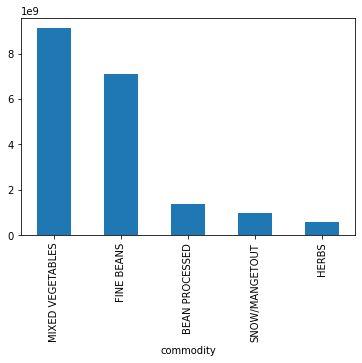

In [0]:
# Q4. Which type of Vegetables had the most value overall?
veg_plot = dataset_df[dataset_df.commodity_type == 'VEGETABLES'].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()
veg_plot.plot.bar()

Mixed Vegetables had the most overall value.

##### Type of Vegetables with Most Value - Monthly

In [0]:
# Vegetables with most value Monthly:
# January

Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
Jan_Month = dataset_df['date'] == '2015-01-25'
dataset_df[Vegetables & Jan_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MIXED VEGETABLES   729606484.00
FINE BEANS         418457153.00
BEAN PROCESSED      98785065.00
HERBS               66894102.00
SNOW/MANGETOUT      60253060.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# Monthly
# January
Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
Feb_Month = dataset_df['date'] == '2015-02-25'
dataset_df[Vegetables & Feb_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MIXED VEGETABLES   725421738.00
FINE BEANS         366244571.00
HERBS               50857934.00
SNOW/MANGETOUT      47406922.00
BROCCOLI            34100101.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# February

Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
Mar_Month = dataset_df['date'] == '2015-03-25'
dataset_df[Vegetables & Mar_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MIXED VEGETABLES   717718712.00
FINE BEANS         489059423.00
SNOW/MANGETOUT      60853618.00
BEAN PROCESSED      48746191.00
SNAP PEAS           47781444.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# March
Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
Apr_Month = dataset_df['date'] == '2015-04-25'
dataset_df[Vegetables & Apr_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MIXED VEGETABLES   633365327.00
FINE BEANS         399694810.00
BEAN PROCESSED      82253200.00
SNOW/MANGETOUT      54629527.00
BROCCOLI            39778693.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# May
Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
May_Month = dataset_df['date'] == '2015-05-25'
dataset_df[Vegetables & May_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MIXED VEGETABLES   691939080.00
FINE BEANS         521513082.00
SNOW/MANGETOUT      62979827.00
CHILLIES            34639231.00
HERBS               29374972.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# June
Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
June_Month = dataset_df['date'] == '2015-06-25'
dataset_df[Vegetables & June_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MIXED VEGETABLES   616169759.00
FINE BEANS         381436864.00
BEAN PROCESSED      95818989.00
SNOW/MANGETOUT      72068896.00
SNAP PEAS           42904783.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# July
Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
July_Month = dataset_df['date'] == '2015-07-25'
dataset_df[Vegetables & July_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MIXED VEGETABLES   732211526.00
FINE BEANS         323223502.00
SNOW/MANGETOUT      68012328.00
BEAN PROCESSED      45666630.00
SNAP PEAS           37032150.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# August
Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
Aug_Month = dataset_df['date'] == '2015-08-25'
dataset_df[Vegetables & Aug_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
FINE BEANS         858853157.00
MIXED VEGETABLES   529819431.00
SNOW/MANGETOUT      66318422.00
BEAN PROCESSED      61076004.00
HERBS               54688172.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# September
Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
Sept_Month = dataset_df['date'] == '2015-09-25'
dataset_df[Vegetables & Sept_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
FINE BEANS         1774714791.00
MIXED VEGETABLES    735490544.00
BEAN PROCESSED      210292071.00
SNOW/MANGETOUT       80590040.00
HERBS                49691349.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# October
Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
Oct_Month = dataset_df['date'] == '2015-10-25'
dataset_df[Vegetables & Oct_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MIXED VEGETABLES   1030132554.00
FINE BEANS          493984409.00
BEAN PROCESSED      393131453.00
SNOW/MANGETOUT      148638393.00
SNAP PEAS            62881540.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# November
Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
Nov_Month = dataset_df['date'] == '2015-11-25'
dataset_df[Vegetables & Nov_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MIXED VEGETABLES   962893852.00
FINE BEANS         544090607.00
BEAN PROCESSED     195231509.00
SNOW/MANGETOUT     156387516.00
HERBS               88636590.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# December
Vegetables = dataset_df['commodity_type'] == 'VEGETABLES'
Dec_Month = dataset_df['date'] == '2015-12-25'
dataset_df[Vegetables & Dec_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MIXED VEGETABLES   1018151186.00
FINE BEANS          538567527.00
BEAN PROCESSED      115660099.00
SNOW/MANGETOUT      105835020.00
HERBS                77814477.00
Name: exportgoods_value_kes, dtype: float64

#### 5.) Type of Fruits with Most Value - Overall

commodity
AVOCADO               4278199690.00
MANGO                 1612449629.00
MACADAMIA              296771819.00
RASPBERRIES/BLISSES    238076738.00
PASSION                111609294.00
Name: exportgoods_value_kes, dtype: float64


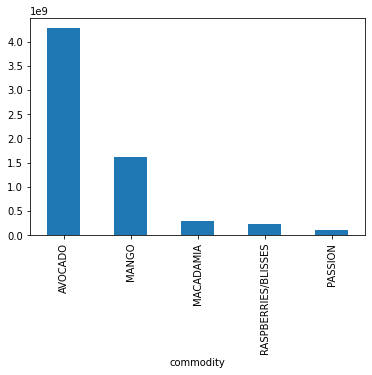

In [0]:
# Q5. Which type of Fruits had the most value? Monthly? Overall?
# Overall
fruit_plot = dataset_df[dataset_df.commodity_type == 'FRUITS'].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()
print(fruit_plot)

fruit_plot.plot.bar()

##### Type of Fruits with Most Value - Monthly

In [0]:
# Monthly 
# January

Fruits = dataset_df['commodity_type'] == 'FRUITS'
Jan_Month = dataset_df['date'] == '2015-01-25'
dataset_df[Fruits & Jan_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MANGO                 194731742.00
RASPBERRIES/BLISSES   136922679.00
AVOCADO               133700475.00
PASSION                10440371.00
LEMON                    491548.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# February

Fruits = dataset_df['commodity_type'] == 'FRUITS'
Feb_Month = dataset_df['date'] == '2015-02-25'
dataset_df[Fruits & Feb_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
MANGO                 183104589.00
AVOCADO               138829619.00
RASPBERRIES/BLISSES    46766980.00
MACADAMIA              28341504.00
PASSION                12363358.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# March

Fruits = dataset_df['commodity_type'] == 'FRUITS'
March_Month = dataset_df['date'] == '2015-03-25'
dataset_df[Fruits & March_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
AVOCADO                    280710051.00
MANGO                      103856783.00
MACADAMIA                   93389231.00
PASSION                     11322102.00
CUSTARD APPLE / SOUR SOP     4824586.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# April

Fruits = dataset_df['commodity_type'] == 'FRUITS'
Apr_Month = dataset_df['date'] == '2015-04-25'
dataset_df[Fruits & Apr_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
AVOCADO                    356620082.00
MACADAMIA                  159286424.00
MANGO                       14908278.00
PASSION                      9300567.00
CUSTARD APPLE / SOUR SOP     5645889.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# May

Fruits = dataset_df['commodity_type'] == 'FRUITS'
May_Month = dataset_df['date'] == '2015-05-25'
dataset_df[Fruits & May_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head()

commodity
AVOCADO                    400999603.00
MANGO                       16844344.00
PASSION                      9684962.00
RASPBERRIES/BLISSES          5533502.00
CUSTARD APPLE / SOUR SOP     2226493.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# June

Fruits = dataset_df['commodity_type'] == 'FRUITS'
June_Month = dataset_df['date'] == '2015-06-25'
dataset_df[Fruits & June_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head(1)

commodity
AVOCADO   523204624.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# July

Fruits = dataset_df['commodity_type'] == 'FRUITS'
July_Month = dataset_df['date'] == '2015-07-25'
dataset_df[Fruits & July_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head(1)

commodity
AVOCADO   827501900.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# August

Fruits = dataset_df['commodity_type'] == 'FRUITS'
Aug_Month = dataset_df['date'] == '2015-08-25'
dataset_df[Fruits & Aug_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head(1)

commodity
AVOCADO   563660062.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# September

Fruits = dataset_df['commodity_type'] == 'FRUITS'
Sept_Month = dataset_df['date'] == '2015-09-25'
dataset_df[Fruits & Sept_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head(1)

commodity
AVOCADO   515199820.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# October

Fruits = dataset_df['commodity_type'] == 'FRUITS'
Oct_Month = dataset_df['date'] == '2015-10-25'
dataset_df[Fruits & Oct_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head(1)

commodity
MANGO   238984572.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# November

Fruits = dataset_df['commodity_type'] == 'FRUITS'
Nov_Month = dataset_df['date'] == '2015-11-25'
dataset_df[Fruits & Nov_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head(1)

commodity
MANGO   291241840.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# December

Fruits = dataset_df['commodity_type'] == 'FRUITS'
Dec_Month = dataset_df['date'] == '2015-12-25'
dataset_df[Fruits & Dec_Month].groupby('commodity')['exportgoods_value_kes'].sum().sort_values(ascending=False).head(1)

commodity
MANGO   366061724.00
Name: exportgoods_value_kes, dtype: float64

#### 6.) Type of Vegetables with Highest Value per kg - Overall

In [0]:
# Q6. Which commodity had the highest value per kg? Monthly? Overall?

# Overall
dataset_df.groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   122825252.02
VEGETABLES     68942414.90
FRUITS         46246349.62
Name: weight_kgs, dtype: float64

##### Type of Vegetables with Highest Value per kg - Monthly

In [0]:
# Monthly
# January

dataset_df[dataset_df.date == '2015-01-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head()


commodity_type
CUT-FLOWERS   10345885.02
VEGETABLES     5109741.04
FRUITS         2714413.30
Name: weight_kgs, dtype: float64

In [0]:
# February 

dataset_df[dataset_df.date == '2015-02-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head(1)


commodity_type
CUT-FLOWERS   12650716.96
Name: weight_kgs, dtype: float64

In [0]:
# March 

dataset_df[dataset_df.date == '2015-03-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head(1)


commodity_type
CUT-FLOWERS   11830679.09
Name: weight_kgs, dtype: float64

In [0]:
# April 

dataset_df[dataset_df.date == '2015-04-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head(1)


commodity_type
CUT-FLOWERS   10873726.19
Name: weight_kgs, dtype: float64

In [0]:
# May

dataset_df[dataset_df.date == '2015-05-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head(1)


commodity_type
CUT-FLOWERS   10848124.97
Name: weight_kgs, dtype: float64

In [0]:
# June

dataset_df[dataset_df.date == '2015-06-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head(1)


commodity_type
CUT-FLOWERS   7648161.56
Name: weight_kgs, dtype: float64

In [0]:
# July

dataset_df[dataset_df.date == '2015-07-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head(1)


commodity_type
CUT-FLOWERS   7957572.83
Name: weight_kgs, dtype: float64

In [0]:
# August

dataset_df[dataset_df.date == '2015-08-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head(1)


commodity_type
CUT-FLOWERS   8204576.18
Name: weight_kgs, dtype: float64

In [0]:
# September

dataset_df[dataset_df.date == '2015-09-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head(1)


commodity_type
CUT-FLOWERS   10538092.72
Name: weight_kgs, dtype: float64

In [0]:
# October

dataset_df[dataset_df.date == '2015-10-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head(1)


commodity_type
CUT-FLOWERS   11377752.17
Name: weight_kgs, dtype: float64

In [0]:
# November

dataset_df[dataset_df.date == '2015-11-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head(1)


commodity_type
CUT-FLOWERS   10218621.27
Name: weight_kgs, dtype: float64

In [0]:
# December

dataset_df[dataset_df.date == '2015-12-25'].groupby("commodity_type")["weight_kgs"].sum().sort_values(ascending=False).head(1)


commodity_type
CUT-FLOWERS   10331343.06
Name: weight_kgs, dtype: float64

#### 7.) Months with the Highest Value of Goods Exported

In [0]:
# Q7. Which month had the highest value of goods exported?
dataset_df.groupby("date")["exportgoods_value_kes"].sum().sort_values(ascending=False).head()


date
2015-03-25   10510448618.00
2015-10-25    9904463953.00
2015-07-25    8550827167.00
2015-09-25    8187323931.00
2015-11-25    8094999879.00
Name: exportgoods_value_kes, dtype: float64

#### 8.) Months with the Lowest Value of Goods Exported

In [0]:
# Q8. Which month had the lowest value of goods exported?
dataset_df.groupby("date")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()


date
2015-06-25   5139749839.00
2015-08-25   5823804772.00
2015-04-25   6223309199.00
2015-05-25   6299715275.00
2015-01-25   6412744223.00
Name: exportgoods_value_kes, dtype: float64

#### 9.) The Commodities that did not sell at all/ Have the least value

In [0]:
# Q9. Which commodity did not sell at all?
dataset_df.groupby("commodity")["exportgoods_value_kes"].sum().sort_values(ascending=True).head()

commodity
CARTHAMUS          0.00
CELERY            30.00
CUCUMBER          50.00
GERBERA          369.00
SWEET POTATOES   464.00
Name: exportgoods_value_kes, dtype: float64

In [0]:
# alternative
df = dataset_df
a = df['exportgoods_value_kes'] == 0
df[a]

,commodity_type,commodity,weight_kgs,exportgoods_value_kes,date
844,FRUITS,STRAWBERRY,2.00,0.00,2015-06-25
1106,CUT-FLOWERS,LISIANTHUS/EUSTOMA,37.91,0.00,2015-08-25
1379,CUT-FLOWERS,CARTHAMUS,175.29,0.00,2015-10-25
1678,CUT-FLOWERS,CARTHAMUS,9.04,0.00,2015-12-25


#### 10.) The Effect of special months on the value of exported commodities

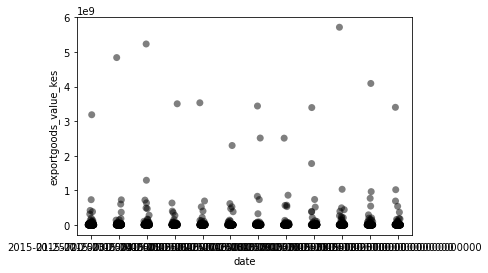

In [0]:
# Q10. How did special months affect the value of goods exported for different types of commodities? (Special months like February and December)
import seaborn as sns

#df.boxplot(column =['exportgoods_value_kes'], by ='date', grid = False)
#bplot = sns.boxplot(y='exportgoods_value_kes', x='date', data=df, width=10.5, palette="colorblind")

bplot = sns.stripplot(y='exportgoods_value_kes', x='date',  data=df, jitter=True, marker='o', alpha=0.5, color='black', size=7)

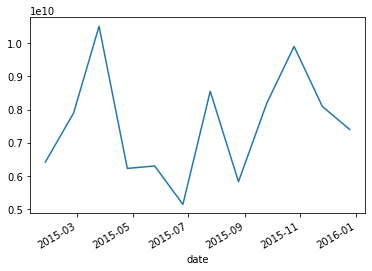

In [0]:
#Grouping the data into months by value of exports
x = dataset_df.groupby(['date'])['exportgoods_value_kes'].sum()
x
# ploting a graph 
x.plot()

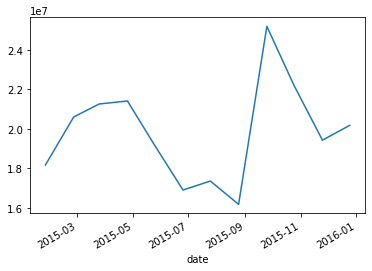

In [0]:
#Grouping the data into months by value of exports
y = dataset_df.groupby('date')['weight_kgs'].sum()
y
# ploting a graph
y.plot()

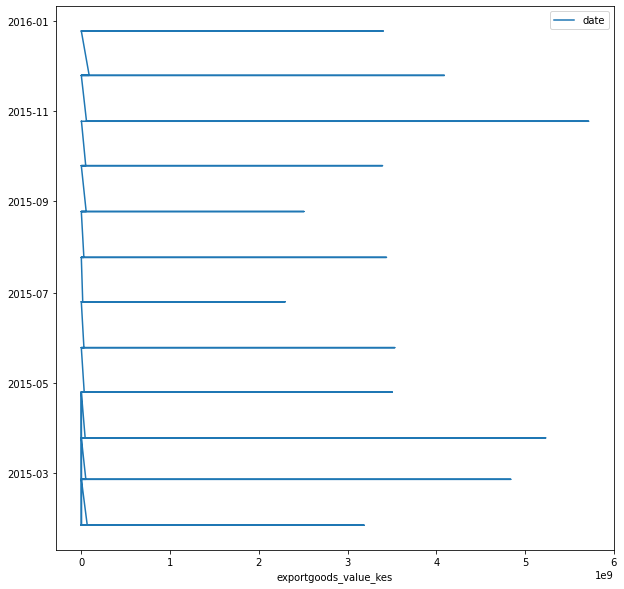

In [0]:
# graph for months vs exportgoods value
df.plot(x = 'exportgoods_value_kes', y = 'date', figsize=(10,10))


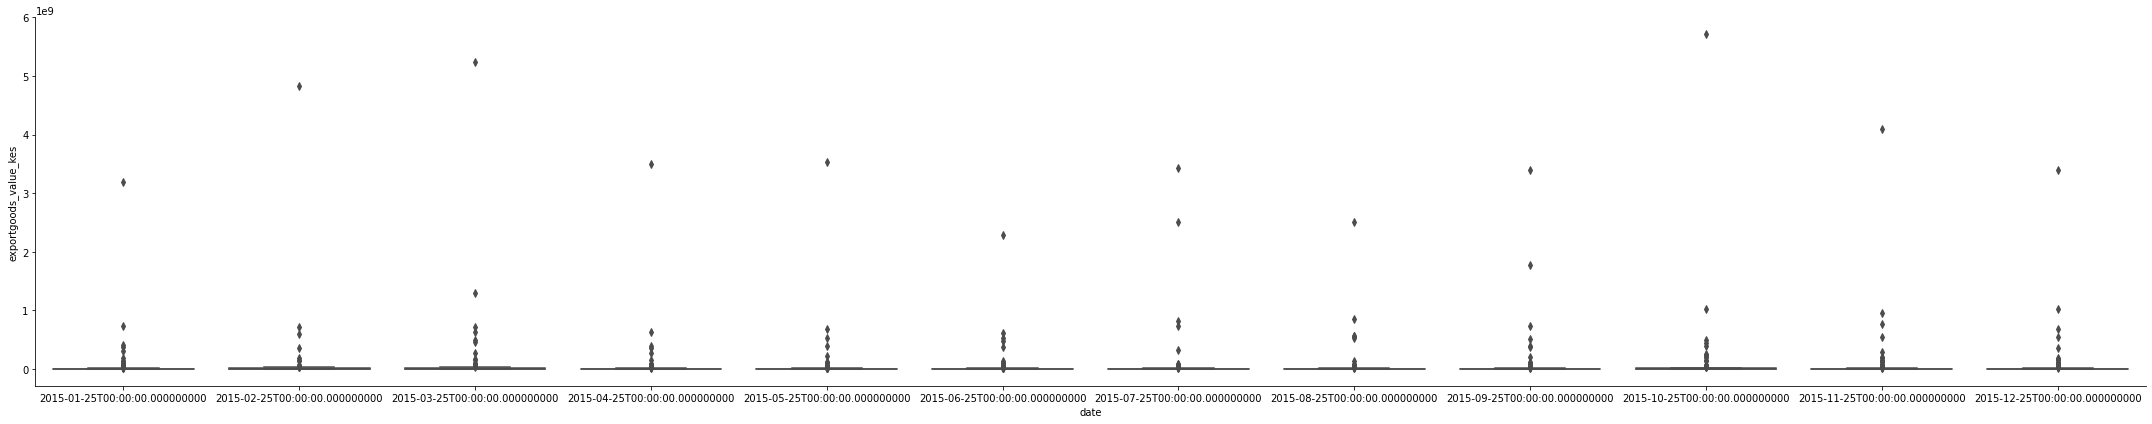

In [0]:
# a plot for all commodities
sns.catplot(
    data=df,
    x='date',
    y='exportgoods_value_kes',
    kind='box',
    height=6, 
    aspect=5,
    color='blue')

by looking at the plots we can see that some months had a significant spike in how much was sold that month.
This months are as follows


*   February
*   March
*   October
*   January
*   April
*   May
*   July
*   September
*   November
*   December


---


It is important to note that October had the highest spike followed by March and February and November respectively.


---


The remaining months in our list seem to show that although there was a sudden spike it was not that big and revolve in the same range.

Months like June, August did not show this sudden spike.








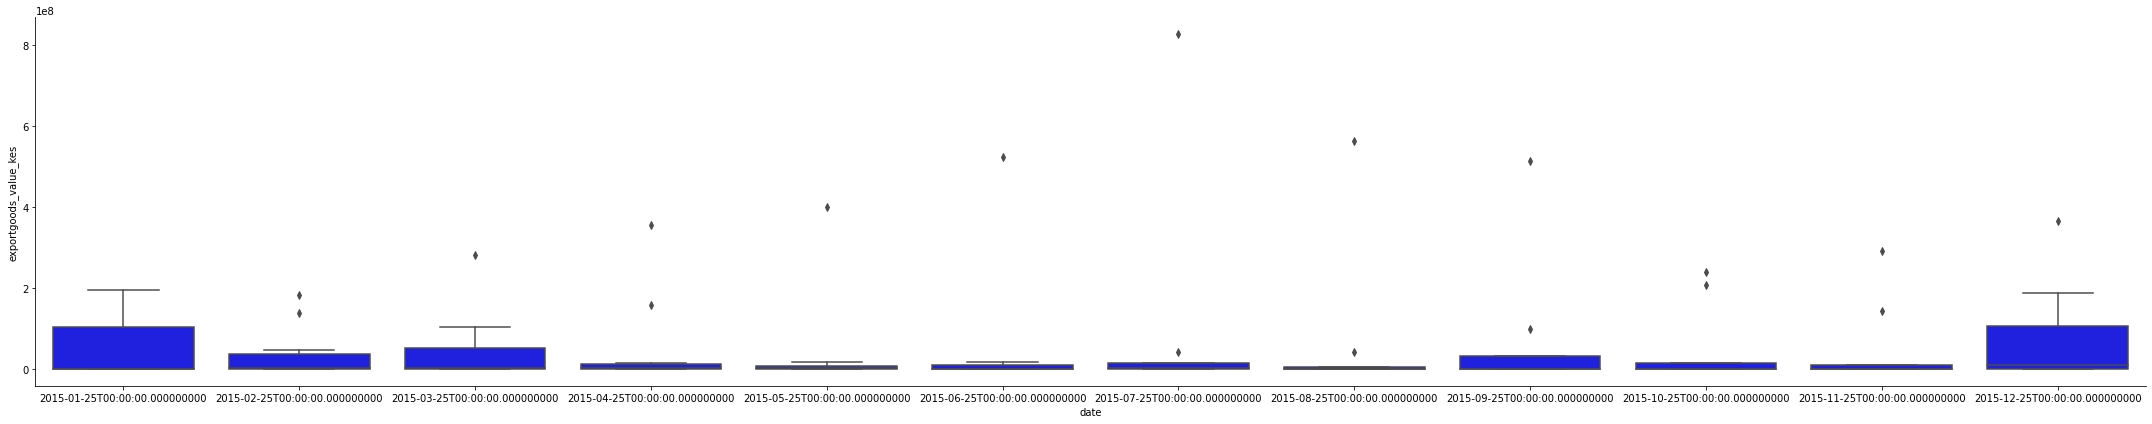

In [0]:
# plot for fruits alone 
flowers = df['commodity_type'] == 'FRUITS'
df1 = df[flowers]
df1
sns.catplot(
    data=df1,
    x='date',
    y='exportgoods_value_kes',
    kind='box',
    height=6, 
    aspect=5,
    color='blue')

Considering just fruits we can see that December and January had significant sales and during the months of summer there were spikes in sales that is June, July and August.

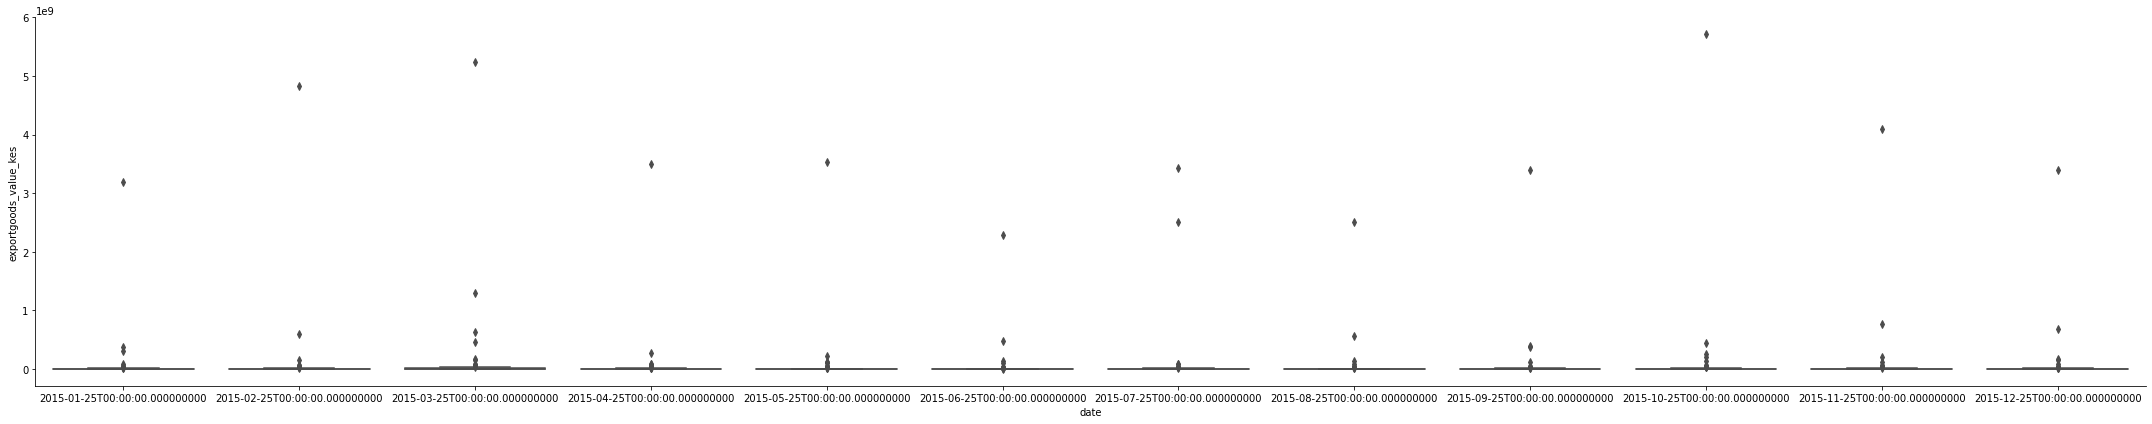

In [0]:
# plot for flowers alone
flowers = df['commodity_type'] == 'CUT-FLOWERS'
df1 = df[flowers]
df1
sns.catplot(
    data=df1,
    x='date',
    y='exportgoods_value_kes',
    kind='box',
    height=6, 
    aspect=5,
    color='blue')

Flowers have a similar behaviour to that of all the commodities considered.

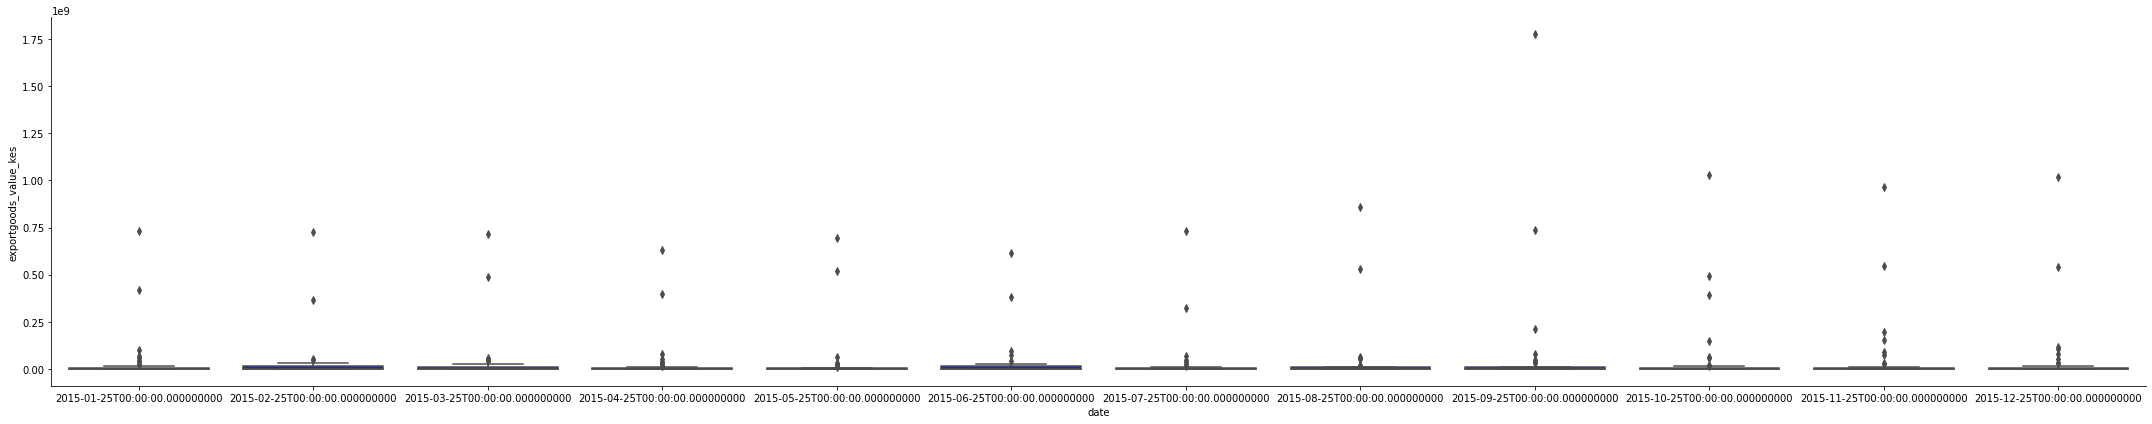

In [0]:
# plot for vegetables
flowers = df['commodity_type'] == 'VEGETABLES'
df1 = df[flowers]
df1
sns.catplot(
    data=df1,
    x='date',
    y='exportgoods_value_kes',
    kind='box',
    height=6, 
    aspect=5,
    color='blue')

Considering Vegetables we can see a spike on September. This spike can be attributed by healthy eating after all the summer food. 


---
It is important to note that the other months have spikes but not that great. This could tell us that vegetables have this cycle where it maintains its spike thus telling us that vegetable sales dont flactuate much.

